#Preprocessing

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
# Import necessary libraries for data processing, model training, visualization & performance metrics
from fastai.vision.all import *
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import torch.nn as nn
import random

# Setting a seed for reproducibility
random.seed(42)

In [39]:
# Define path to data
path = Path('/content/gdrive/My Drive/477 Project - Fall 2023/Capacitive Images IPCCC2016 Rilvan/ex1')

In [40]:
# Function to retrieve all image files from 'thumb' directories
def get_thumb_image_files(path):
    return [p for p in path.rglob('thumb/*.jpg')]

# Function to label the items (Used in datablock)
def label_func(f): return f.parent.parent.name

# Function to determine if a file is in the validation set (Used in datablock)
def is_valid_func(f):
    return f in valid_files

In [41]:
# Retrieve all ear images
all_files = get_thumb_image_files(path)

# Get all labels from the file paths
all_labels = [label_func(f) for f in all_files]

# Split the data into a 60% training set and a 40% temporary set (to be divided into validation and test sets), stratified by labels
train_files, temp_files, train_labels, temp_labels = train_test_split(all_files, all_labels, test_size=0.4, stratify=all_labels, random_state=42)

# Split the remaining 40% of data equally between validation and test sets, resulting in a final split of 60% train, 20% valid, and 20% test
valid_files, test_files, valid_labels, test_labels = train_test_split(temp_files, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [42]:
# This script counts and displays the number of image files associated with
# each individual by extracting the user's name from the file path structure.

counts = defaultdict(int)

# Function to extract the name from the file path
def get_name_from_file(file_path):
    name = file_path.parent.parent.name
    return name.lower()

# Update the counts for each file
for f in all_files:
    name = get_name_from_file(Path(f))
    counts[name] += 1

# Print out the counts
for name, count in sorted(counts.items()):
    print(f"{name}: {count}")

bree: 20
cody: 20
dennis: 20
eric: 20
evanmoyher: 20
isaiah: 20
jesse: 20
john: 20
justin: 20
kevin: 20
kolby: 20
kristina: 20
lamarque: 20
maddie: 20
mohamed: 20
mudhasir: 20
sal: 20
thomas: 20
veronica: 20
victor: 20
yodsapath: 20


#Dataloader

In [43]:
# Create a DataBlock
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=FuncSplitter(is_valid_func),
                   get_y=label_func
                   )

# Create a Dataloader from the train and valid files
dls = dblock.dataloaders(train_files + valid_files, bs=32)

In [44]:
dls.vocab

['Bree', 'Cody', 'Dennis', 'Eric', 'EvanMoyher', 'Isaiah', 'Jesse', 'John', 'Justin', 'Kevin', 'Kolby', 'Kristina', 'Lamarque', 'Maddie', 'Mohamed', 'Mudhasir', 'Sal', 'Thomas', 'Veronica', 'Victor', 'yodsapath']

In [45]:
# Display # of batches in each set
print(f"Number of batches in the training set: {len(dls.train)}")
print(f"Number of batches in the validation set: {len(dls.valid)}")

# Display # of samples in each set
print(f"Number of samples in the training set: {len(dls.train_ds)}")
print(f"Number of samples in the validation set: {len(dls.valid_ds)}")

Number of batches in the training set: 7
Number of batches in the validation set: 3
Number of samples in the training set: 252
Number of samples in the validation set: 84


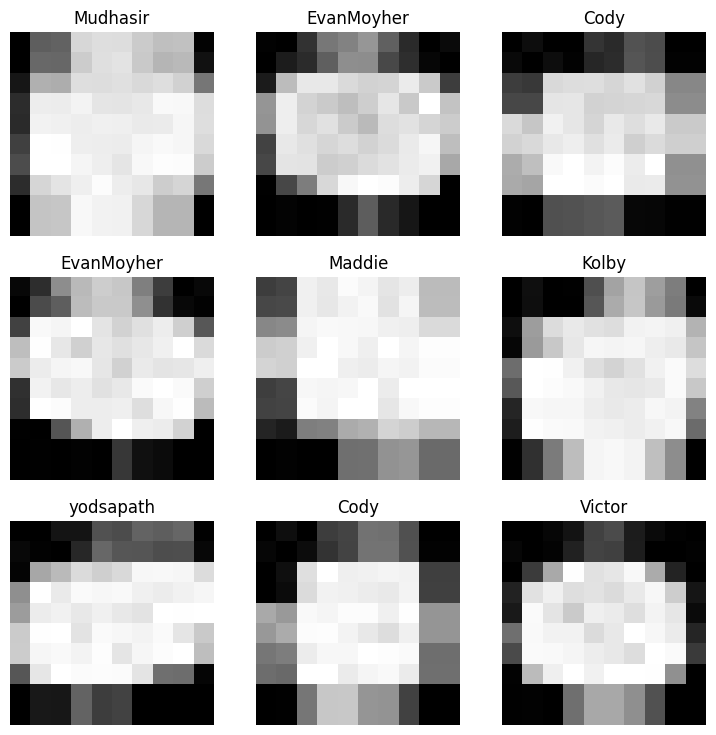

In [16]:
dls.show_batch()

#Training

In [56]:
loss_func = nn.CrossEntropyLoss()

#Create learner
learn = vision_learner(dls, resnet18, metrics=[accuracy], opt_func=Adam, loss_func = loss_func)

SuggestedLRs(valley=0.002511886414140463)

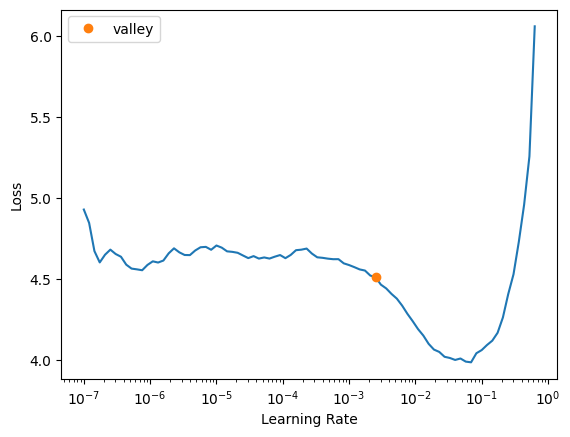

In [57]:
# Freeze model except for final layer
learn.freeze()

learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,4.711159,3.127044,0.047619,00:01
1,4.450597,3.290374,0.047619,00:01
2,4.149618,3.308350,0.095238,00:01
3,3.761424,3.133182,0.107143,00:01
4,3.415215,3.177812,0.130952,00:01
5,3.167957,3.424750,0.190476,00:01
6,2.945787,3.220153,0.202381,00:01
7,2.791156,3.120249,0.226190,00:01
8,2.679578,2.952505,0.261905,00:01
9,2.596134,2.859356,0.261905,00:01


Better model found at epoch 0 with valid_loss value: 3.127044200897217.


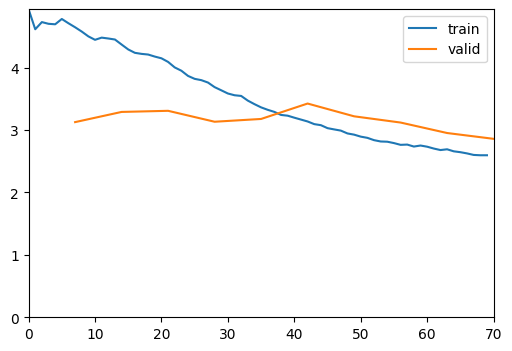

Better model found at epoch 7 with valid_loss value: 3.120248794555664.
Better model found at epoch 8 with valid_loss value: 2.952504873275757.
Better model found at epoch 9 with valid_loss value: 2.859356164932251.


In [58]:
# Train final layer
learn.fit_one_cycle(10,
    lr_max= 0.0025,
    cbs=[
        ShowGraphCallback(),
        SaveModelCallback(monitor='valid_loss', fname='best_model_phase1', every_epoch=False)
        ])

In [59]:
learn.load('best_model_phase1',with_opt=False)

SuggestedLRs(valley=0.0002290867705596611)

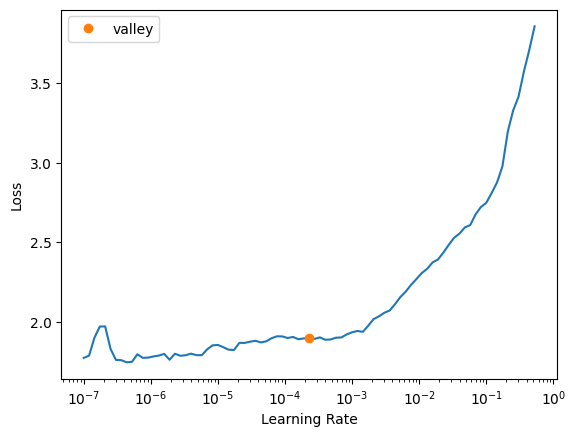

In [60]:
# Unfreeze model
learn.unfreeze()

learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,1.925343,2.787612,0.273810,00:02
1,1.928220,2.772173,0.285714,00:02
2,2.015887,2.765232,0.321429,00:02
3,1.979986,2.808642,0.321429,00:01
4,1.960032,2.799797,0.333333,00:01
5,1.877624,2.739054,0.309524,00:01
6,1.821967,2.701031,0.285714,00:01
7,1.775075,2.777677,0.309524,00:01
8,1.789060,2.753040,0.309524,00:01
9,1.765303,2.737899,0.369048,00:01


Better model found at epoch 0 with valid_loss value: 2.7876124382019043.


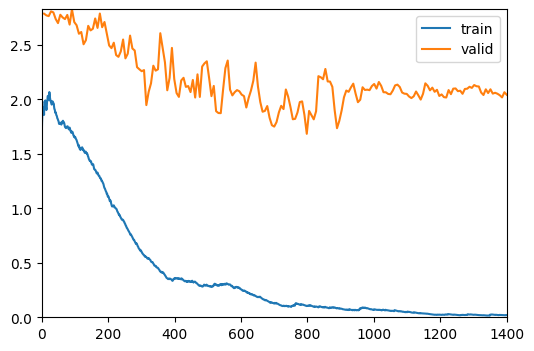

Better model found at epoch 1 with valid_loss value: 2.7721729278564453.
Better model found at epoch 2 with valid_loss value: 2.7652318477630615.
Better model found at epoch 5 with valid_loss value: 2.7390544414520264.
Better model found at epoch 6 with valid_loss value: 2.70103120803833.
Better model found at epoch 11 with valid_loss value: 2.6873373985290527.
Better model found at epoch 14 with valid_loss value: 2.681478500366211.
Better model found at epoch 15 with valid_loss value: 2.6035468578338623.
Better model found at epoch 17 with valid_loss value: 2.506723642349243.
Better model found at epoch 28 with valid_loss value: 2.495990514755249.
Better model found at epoch 29 with valid_loss value: 2.4712183475494385.
Better model found at epoch 31 with valid_loss value: 2.407820224761963.
Better model found at epoch 32 with valid_loss value: 2.3912038803100586.
Better model found at epoch 35 with valid_loss value: 2.377420425415039.
Better model found at epoch 40 with valid_loss va

In [61]:
# Train the entire model
learn.fit_one_cycle(
    200,
    lr_max= 0.0002,
    cbs=[
        ShowGraphCallback(),
        SaveModelCallback(monitor='valid_loss', fname='best_model_phase2', every_epoch=False)
        ])

In [62]:
learn.load('best_model_phase2', with_opt=False)

#Validation Set Performance

In [63]:
# Get predictions and targets from learner
preds, targets = learn.get_preds()

# Convert predictions to class label
pred_labels = preds.argmax(dim=-1)


print(classification_report(targets, pred_labels, target_names=dls.vocab))

              precision    recall  f1-score   support

        Bree       0.80      1.00      0.89         4
        Cody       1.00      0.50      0.67         4
      Dennis       0.60      0.75      0.67         4
        Eric       1.00      0.75      0.86         4
  EvanMoyher       0.20      0.25      0.22         4
      Isaiah       0.67      0.50      0.57         4
       Jesse       1.00      0.50      0.67         4
        John       0.75      0.75      0.75         4
      Justin       0.75      0.75      0.75         4
       Kevin       0.25      0.25      0.25         4
       Kolby       1.00      1.00      1.00         4
    Kristina       1.00      0.75      0.86         4
    Lamarque       1.00      1.00      1.00         4
      Maddie       1.00      0.50      0.67         4
     Mohamed       0.67      1.00      0.80         4
    Mudhasir       0.25      0.25      0.25         4
         Sal       1.00      0.75      0.86         4
      Thomas       0.67    

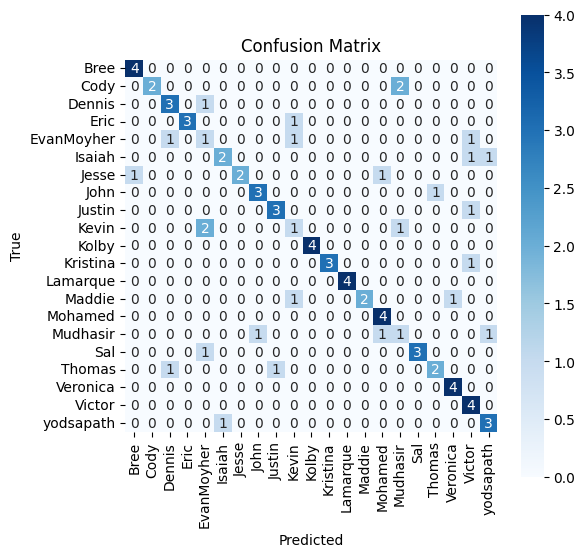

In [64]:
# Calculate the confusion matrix
cm_valid = confusion_matrix(targets, pred_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues', xticklabels=dls.vocab, yticklabels=dls.vocab, square=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Test Set Performance

In [65]:
test_dl = dls.test_dl(test_files, with_labels=True)

# Print the number of items in the test set
print(f"Number of samples in the test set: {len(test_dl.dataset)}")

Number of samples in the test set: 84


In [66]:
preds_test, true_labels = learn.get_preds(dl=test_dl)

# Convert predictions to class label
pred_labels = preds_test.argmax(dim=-1)

print(classification_report(true_labels, pred_labels, target_names=dls.vocab))

              precision    recall  f1-score   support

        Bree       0.75      0.75      0.75         4
        Cody       0.50      0.25      0.33         4
      Dennis       0.67      0.50      0.57         4
        Eric       1.00      0.50      0.67         4
  EvanMoyher       1.00      0.75      0.86         4
      Isaiah       0.67      0.50      0.57         4
       Jesse       0.60      0.75      0.67         4
        John       0.43      0.75      0.55         4
      Justin       0.57      1.00      0.73         4
       Kevin       0.40      0.50      0.44         4
       Kolby       0.80      1.00      0.89         4
    Kristina       0.80      1.00      0.89         4
    Lamarque       0.50      0.50      0.50         4
      Maddie       0.67      0.50      0.57         4
     Mohamed       0.75      0.75      0.75         4
    Mudhasir       0.25      0.25      0.25         4
         Sal       1.00      0.75      0.86         4
      Thomas       1.00    

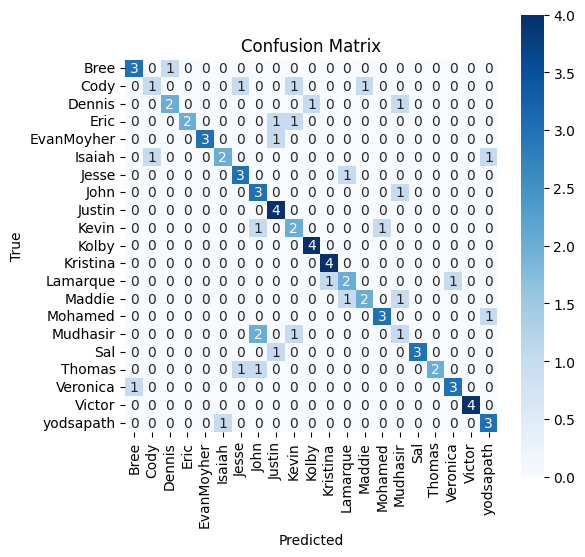

In [67]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dls.vocab, yticklabels=dls.vocab, square=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()